# Data Generation Process

Model: ARIMA(3,0,2)-EGARCH(1,1) $\\$
True parameter: phi = c(0.6, -0.5, 0.25); theta = c(-0.4, 0.65); egarch = c(-0.8, 0.1, -0.2, 0.9)


In [2]:
data <- read.csv("C:/Users/user/Desktop/Research Papers/ARIMA GARCH/data.csv")$x
data <- na.omit(data)
print(length(data))

[1] 1500


# Data Analysis


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.097979 -0.009286  0.002474  0.001656  0.014260  0.067075 


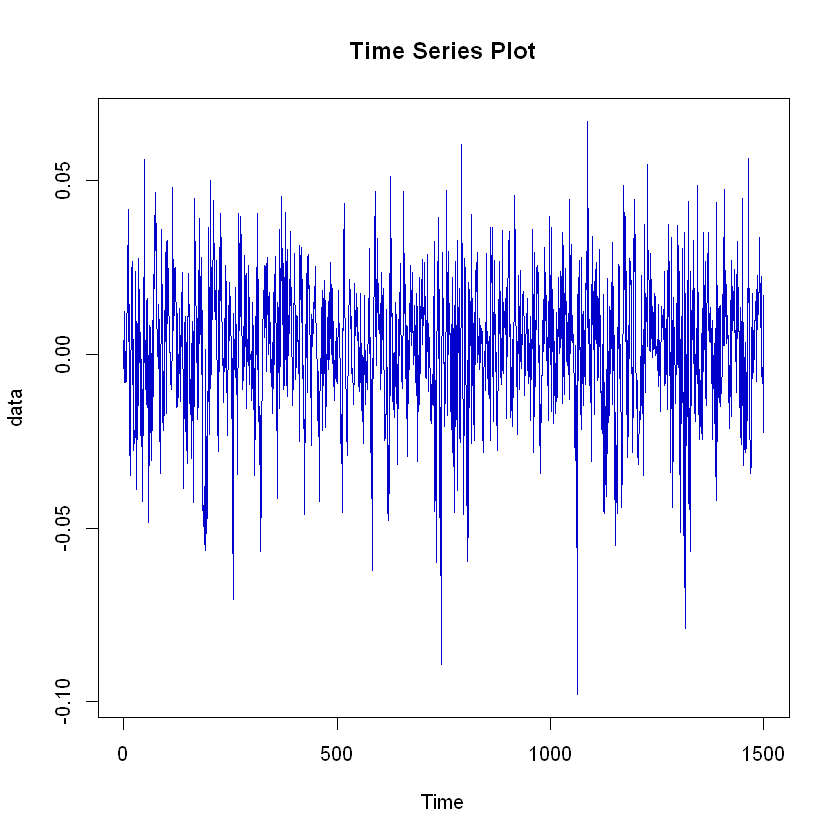

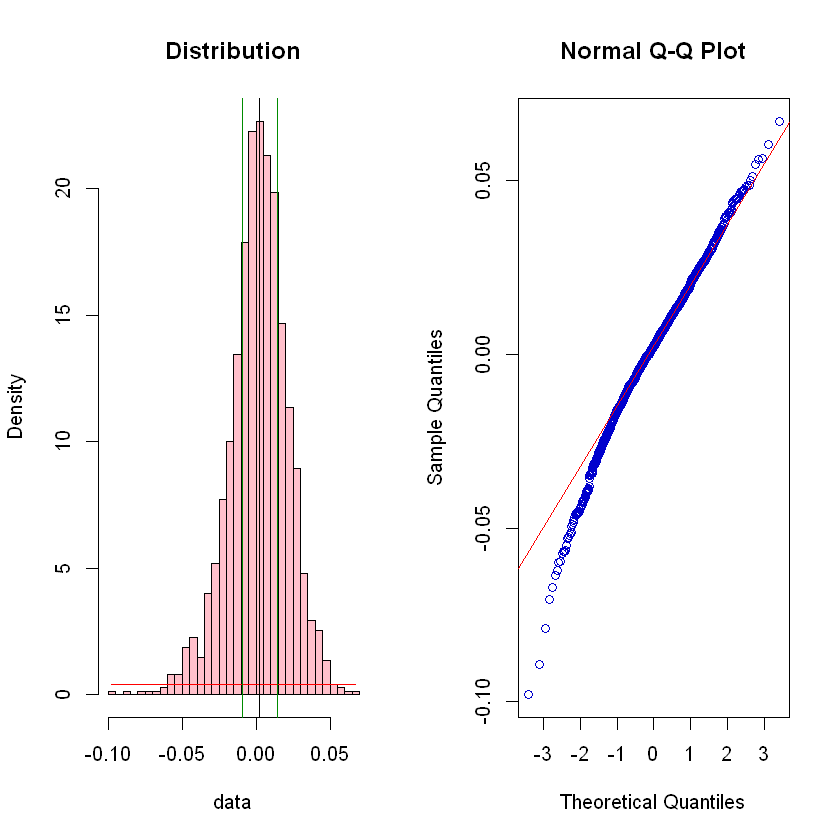

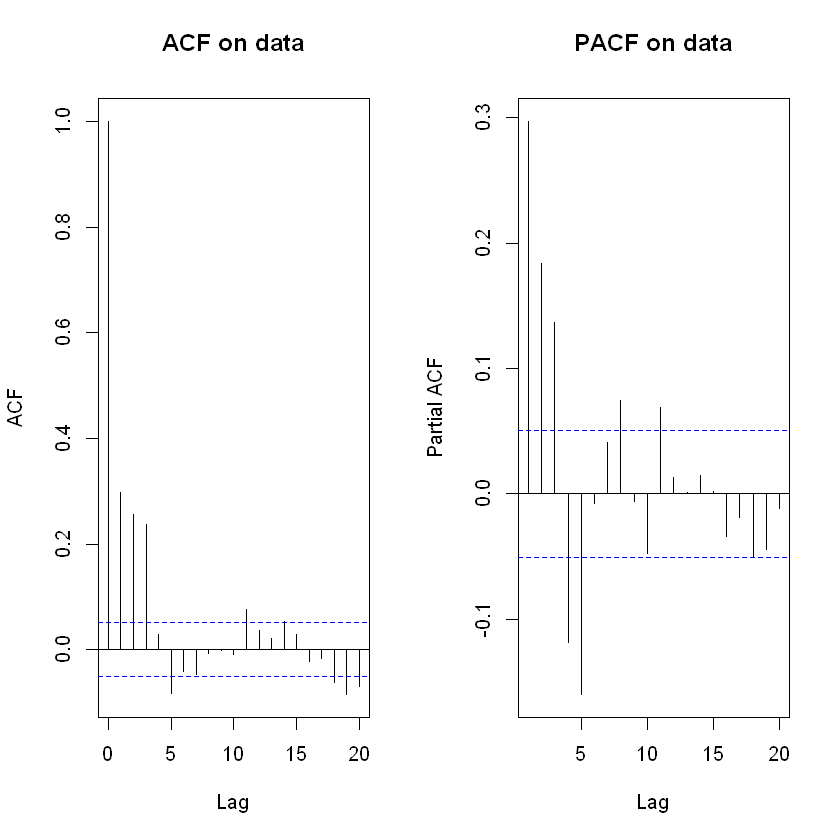

In [3]:
print(summary(data))
## Graph 1: Time Series
par(mfcol=c(1,1))
plot(data, type="l", col="blue3", main="Time Series Plot", xlab="Time")
## Graph 2: Distribution Histogram & QQ Plot
par(mfcol=c(1,2))
hist(data, nclass=30, col="pink", freq=FALSE, main="Distribution")
t <- seq(min(data),max(data), length=301)
points(t, dnorm(t), col="red", type="l")
abline(v=summary(data)[2], lwd=1.5, col="green4")
abline(v=summary(data)[3], lwd=1.5, col="black")
abline(v=summary(data)[5], lwd=1.5, col="green4")

qqnorm(data, main="Normal Q-Q Plot", col="blue3")
qqline(data, col="red")
## Graph 3: ACF and PACF Plot
par(mfcol=c(1,2))
acf(data, lag.max = 20, plot=TRUE, main="ACF on data")
pacf(data, lag.max = 20, plot=TRUE, main="PACF on data")

Observations:

1. Non-normal distribution
2. Clear AR and MA properties


## Stationary test


In [4]:
library(tseries)
adf.test(data)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(data):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -9.9288, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


Test Result: The data is stationary under $\alpha$ =5%


# ARMA and EGARCH Model


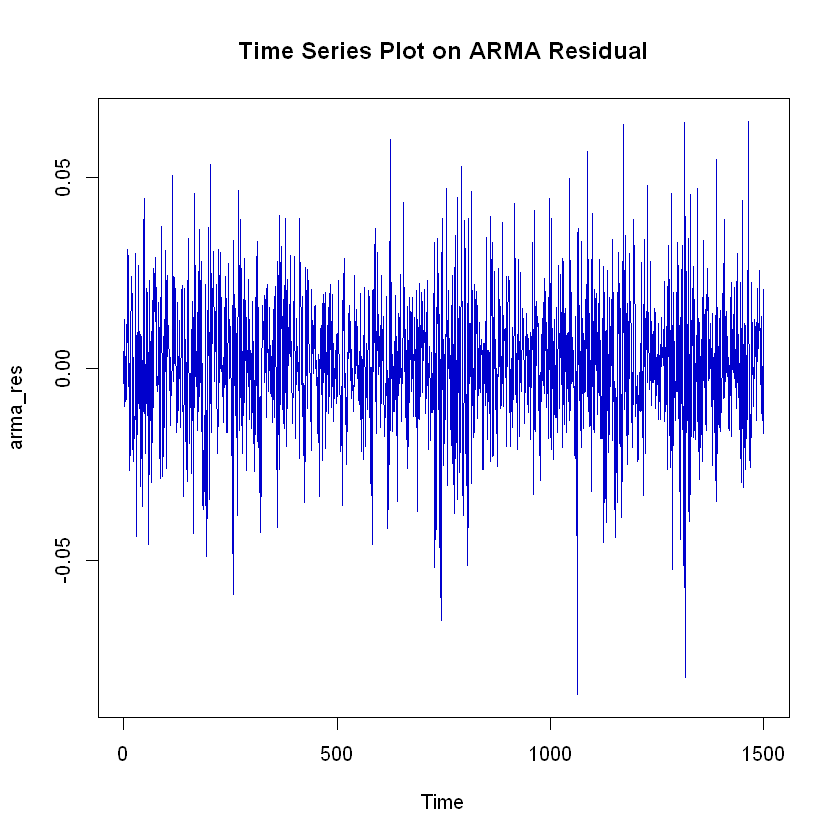

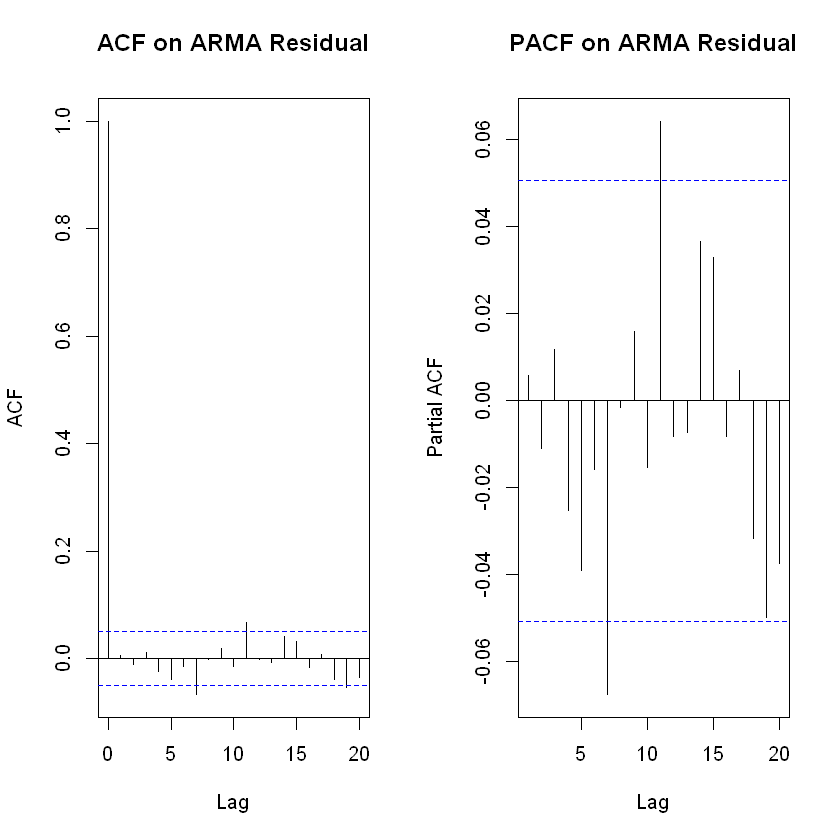

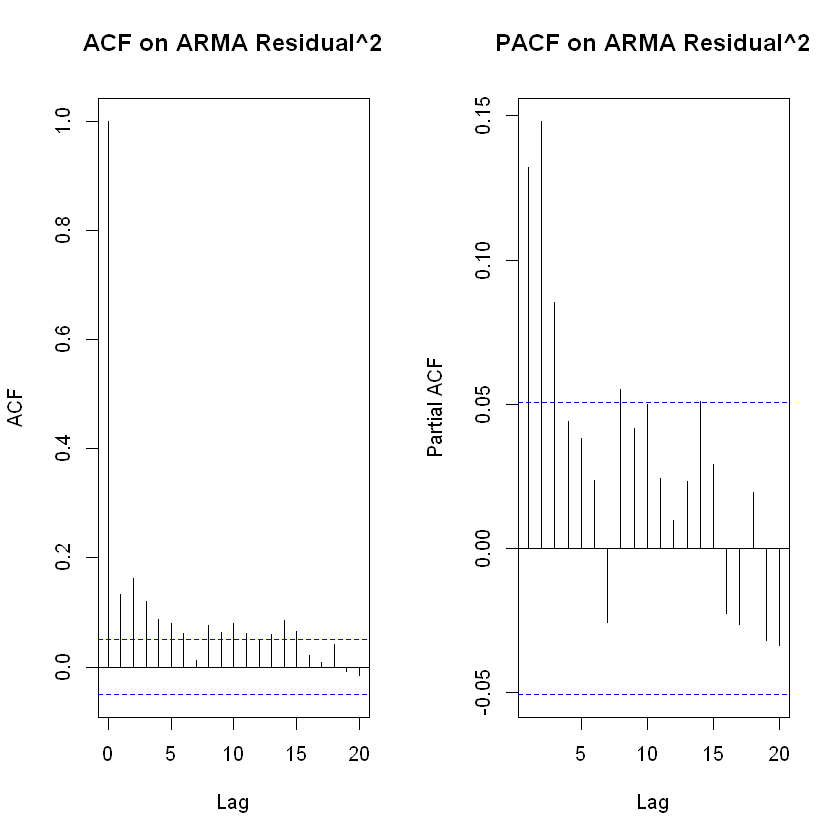

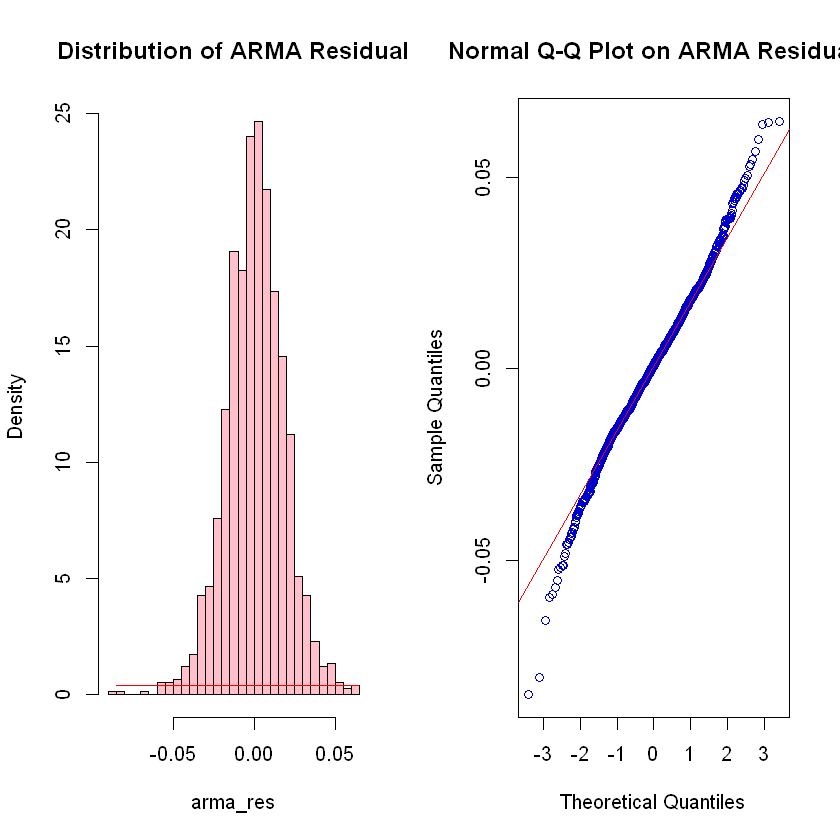

In [5]:
m=3; n=2
arma_model = arima(data, order=c(m,0,n), include.mean = FALSE)
arma_res = arma_model$residuals
## Graph 1: Time Series
par(mfcol=c(1,1))
plot(arma_res, type="l", col="blue3", main="Time Series Plot on ARMA Residual", xlab="Time")
## Graph 2: ACF and PACF
par(mfcol=c(1,2))
acf(arma_res, lag.max = 20, plot=TRUE, main="ACF on ARMA Residual")
pacf(arma_res, lag.max = 20, plot=TRUE, main="PACF on ARMA Residual")

acf(arma_res^2, lag.max = 20, plot=TRUE, main="ACF on ARMA Residual^2")
pacf(arma_res^2, lag.max = 20, plot=TRUE, main="PACF on ARMA Residual^2")
## Graph 3: Distribution Histogram & QQ Plot
par(mfcol=c(1,2))
hist(arma_res, nclass=30, col="pink", freq=FALSE, main="Distribution of ARMA Residual")
t <- seq(min(arma_res),max(arma_res), length=301)
points(t, dnorm(t), col="red", type="l")
qqnorm(arma_res, main="Normal Q-Q Plot on ARMA Residual", col="blue3")
qqline(arma_res, col="red")

In [6]:
Box.test(arma_res, lag=15, type="Ljung")
Box.test(arma_res^2, lag=15, type="Ljung")


	Box-Ljung test

data:  arma_res
X-squared = 22.822, df = 15, p-value = 0.08799



	Box-Ljung test

data:  arma_res^2
X-squared = 171.65, df = 15, p-value < 2.2e-16


Observation & Test Result:

1. $\varepsilon_{ARMA}$ shows no (very little) auto-correlation, ARMA mean model explains well
2. $\varepsilon_{ARMA}$ does not follow Normal
3. $\varepsilon_{ARMA}^2$ shows significant autocorrrlation


In [7]:
library(rugarch)
spec <- ugarchspec(variance.model=list(model="eGARCH",garchOrder=c(1,1)),
                   mean.model=list(armaOrder=c(0,0), include.mean=FALSE),
                   distribution.model="norm")
egarch_model <- ugarchfit(spec, arma_res)
show(egarch_model)

Loading required package: parallel




Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma





*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   -0.79939    0.003627 -220.372        0
alpha1  -0.22214    0.018584  -11.953        0
beta1    0.90038    0.000483 1865.465        0
gamma1   0.10560    0.009530   11.081        0

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
omega   -0.79939    0.006865 -116.4362        0
alpha1  -0.22214    0.018008  -12.3351        0
beta1    0.90038    0.000538 1674.9610        0
gamma1   0.10560    0.011849    8.9117        0

LogLikelihood : 3976.779 

Information Criteria
------------------------------------
                    
Akaike       -5.2970
Bayes        -5.2829
Shibata      -5.2971
Hannan-Quinn -5.2918


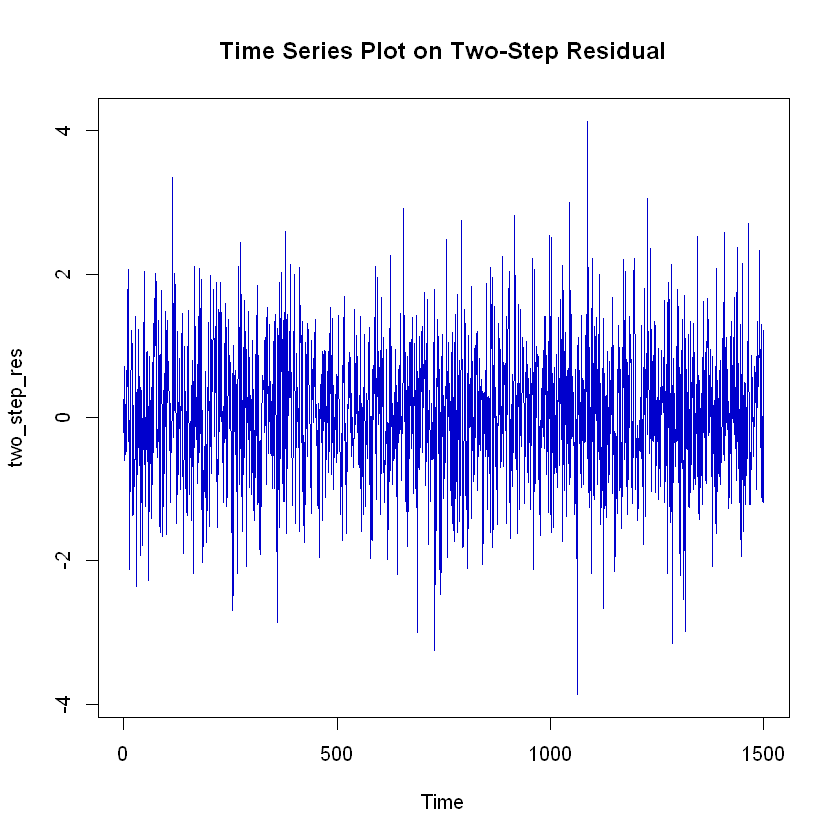

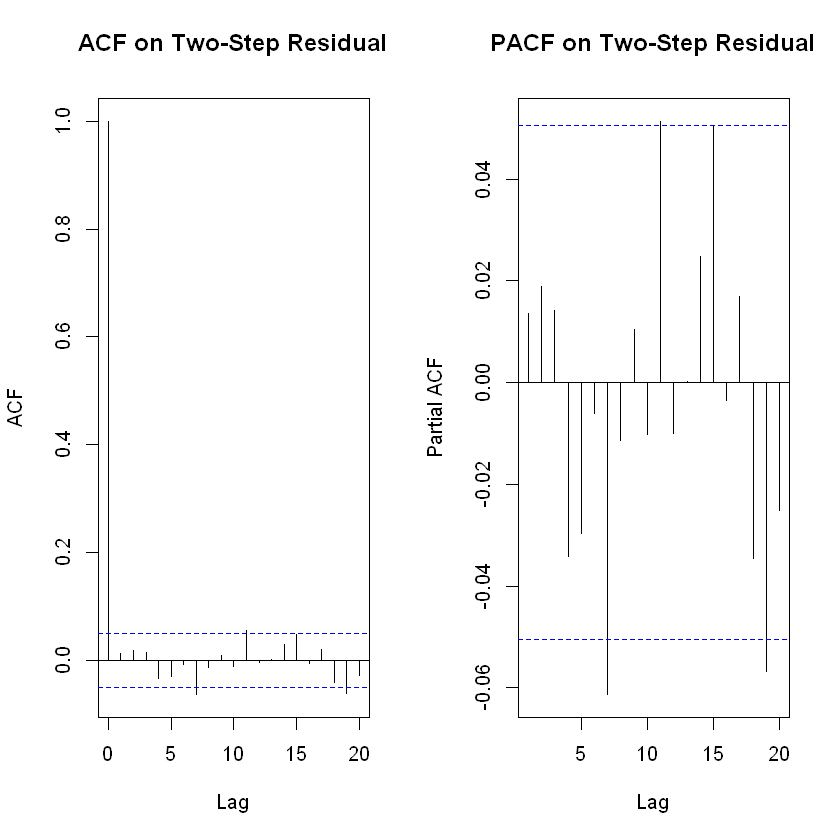

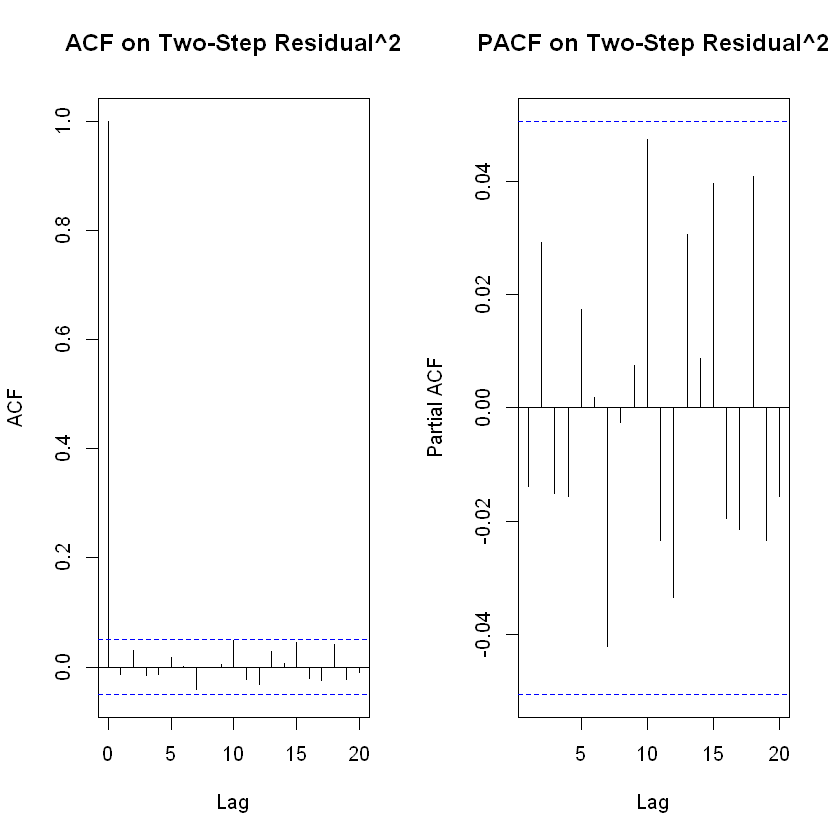

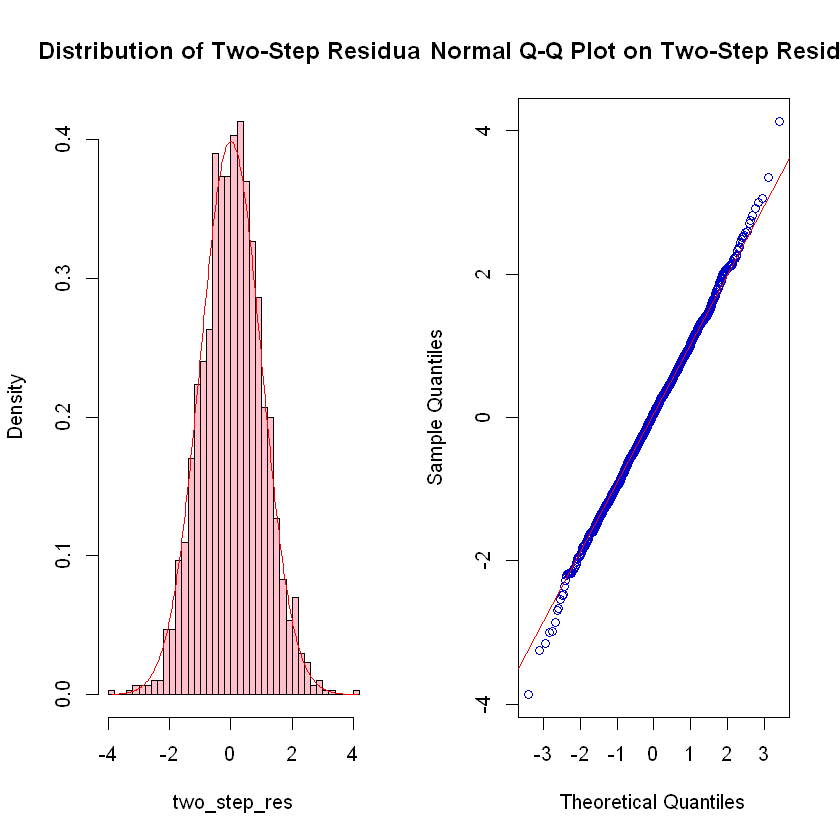

In [8]:
two_step_res <- as.numeric(residuals(egarch_model, standardize=TRUE))
## Graph 1: Time Series
par(mfcol=c(1,1))
plot(two_step_res, type="l", col="blue3", main="Time Series Plot on Two-Step Residual", xlab="Time")
## Graph 2: ACF and PACF
par(mfcol=c(1,2))
acf(two_step_res, lag.max = 20, plot=TRUE, main="ACF on Two-Step Residual")
pacf(two_step_res, lag.max = 20, plot=TRUE, main="PACF on Two-Step Residual")
acf(two_step_res^2, lag.max = 20, plot=TRUE, main="ACF on Two-Step Residual^2")
pacf(two_step_res^2, lag.max = 20, plot=TRUE, main="PACF on Two-Step Residual^2")
## Graph 3: Distribution Histogram & QQ Plot
par(mfcol=c(1,2))
hist(two_step_res, nclass=30, col="pink", freq=FALSE, main="Distribution of Two-Step Residual")
t <- seq(min(two_step_res),max(two_step_res), length=301)
points(t, dnorm(t), col="red", type="l")
qqnorm(two_step_res, main="Normal Q-Q Plot on Two-Step Residual", col="blue3")
qqline(two_step_res, col="red")

In [9]:
Box.test(two_step_res, lag=15, type="Ljung")
Box.test(two_step_res^2, lag=15, type="Ljung")


	Box-Ljung test

data:  two_step_res
X-squared = 20.6, df = 15, p-value = 0.1501



	Box-Ljung test

data:  two_step_res^2
X-squared = 15.339, df = 15, p-value = 0.4273


Observations:

1. Heteroskedasticity is captured, where $\varepsilon$ and $\varepsilon^2$ do NOT show auto-correlation
2. $\varepsilon$ follows Normal distribution moderately


# Joint MLE


In [13]:
arma_egarch_loglik <- function(para, r, m, n){
  # para: phi_1:m, theta_1:n, omega, alpha, gamma, beta
  # r: data input
  # m,n: ARMA(m,n)
  d_len <- length(r)
  ## Extract parameters
  phi <- if(m > 0) para[1:m] else numeric(0)
  theta <- if(n > 0) para[(1+m):(m+n)] else numeric(0)
  omega <- para[1+m+n]; alpha <- para[2+m+n]; gamma <- para[3+m+n]; beta <- para[4+m+n]
  Ez <- sqrt(2/pi) # If z follows N(0,1)
  ## Initialization
  start_idx <- max(m,n,1)+1
  eps <- numeric(d_len)
  sigma2 <- numeric(d_len); sigma2[1:(start_idx-1)] <- var(r)
  loglik <- numeric(d_len)
  ## Iteration
  for (t in start_idx:d_len){
    ar_value <- sum(phi * r[(t-1):(t-m)])
    ma_value <- sum(theta * eps[(t-1):(t-n)])
    eps[t] <- r[t] - ar_value - ma_value
    z_lag <- eps[t-1]/sqrt(sigma2[t-1])
    ln_sigma2 <- omega + alpha*(abs(z_lag)-Ez) + gamma*z_lag + beta*log(sigma2[t-1])
    sigma2[t] <- exp(ln_sigma2)
    if (sigma2[t] < 1e-8){
      loglik[t] <- 0.5*(ln_sigma2 + 1e8*eps[t]^2)
    }else{
      loglik[t] <- 0.5*(ln_sigma2 + eps[t]^2/sigma2[t])
    }
  }
  return(sum(loglik))
}

In [14]:
## Initialization
arma_coef_init <- arma_model$coef
egarch_coef_init <- c(coef(egarch_model)[1], coef(egarch_model)[4], coef(egarch_model)[2], coef(egarch_model)[3])
para_init <- c(arma_coef_init, egarch_coef_init)
# arma_egarch_loglik(para=para_init, data, m=3, n=2)

## Parameter Constraints (omega, alpha, gamma, beta)
m_error <- 1e-7
lower_b <- c(rep(-1+m_error, m+n), -Inf, 1e-6, -Inf, -0.999)
upper_b <- c(rep(1-m_error, m+n), -m_error, Inf, -m_error, 0.999)

In [15]:
## Optimzation
s <- Sys.time()
opt <- optim(par=para_init, fn=arma_egarch_loglik, r=data, m=3, n=2, method="L-BFGS-B", lower=lower_b, upper=upper_b, hessian=TRUE)
print(Sys.time()-s)
### Results
if (opt$convergence == 0){
  hessian = opt$hessian
  joint_mle_para <- opt$par
  join_mle_loglik <- opt$value
} else{
  print("Optimzation did NOT converge")
}

Time difference of 10.21755 secs


In [16]:
print(as.numeric(joint_mle_para)) # para: phi_1:m, theta_1:n, omega, alpha, gamma, beta

[1]  0.6169885 -0.5077654  0.2432455 -0.3921069  0.6664284 -0.8102197  0.1049038
[8] -0.2313952  0.8992151


In [17]:
arma_egarch_fit <- function(para, r, m, n){
  # para: phi_1:m, theta_1:n, omega, alpha, gamma, beta
  # r: data input
  # m,n: ARMA(m,n)
  d_len <- length(r)
  ## Extract parameters
  phi <- if(m > 0) para[1:m] else numeric(0)
  theta <- if(n > 0) para[(1+m):(m+n)] else numeric(0)
  omega <- para[1+m+n]; alpha <- para[2+m+n]; gamma <- para[3+m+n]; beta <- para[4+m+n]
  Ez <- sqrt(2/pi) # If z follows N(0,1)
  ## Initialization
  start_idx <- max(m,n,1)+1
  eps <- numeric(d_len)
  sigma2 <- numeric(d_len); sigma2[1:(start_idx-1)] <- var(r)
  z <- numeric(d_len)
  for (t in start_idx:d_len){
    ar_value <- sum(phi * r[(t-1):(t-m)])
    ma_value <- sum(theta * eps[(t-1):(t-n)])
    eps[t] <- r[t] - ar_value - ma_value
    z_lag <- eps[t-1]/sqrt(sigma2[t-1])
    ln_sigma2 <- omega + alpha*(abs(z_lag)-Ez) + gamma*z_lag + beta*log(sigma2[t-1])
    sigma2[t] <- exp(ln_sigma2)
    z[t] <- eps[t]/sqrt(sigma2[t])
  }
  return(z)
}

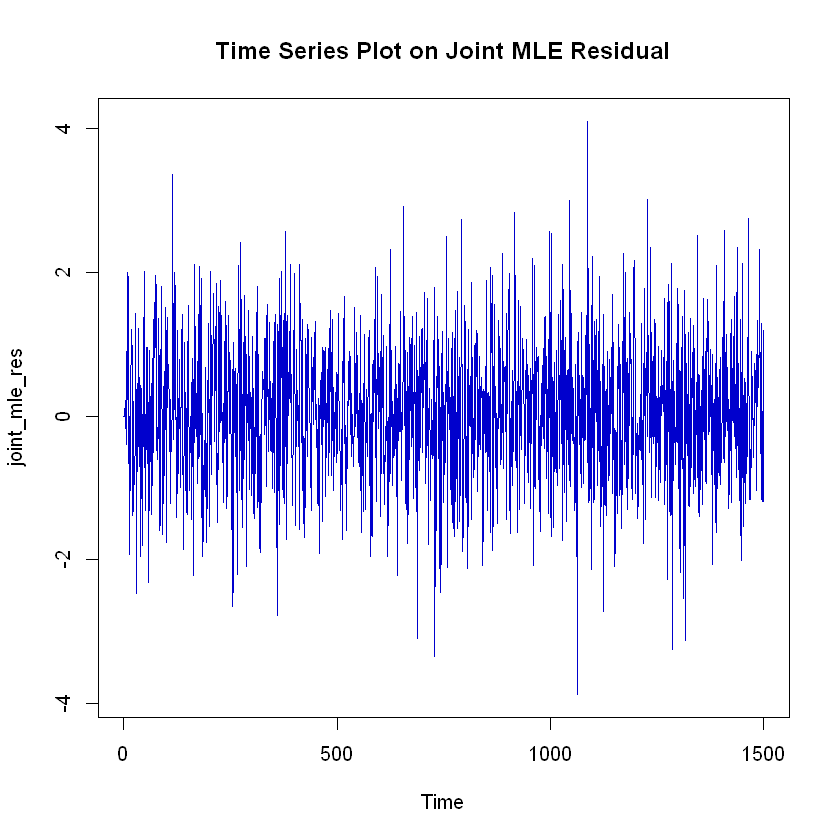

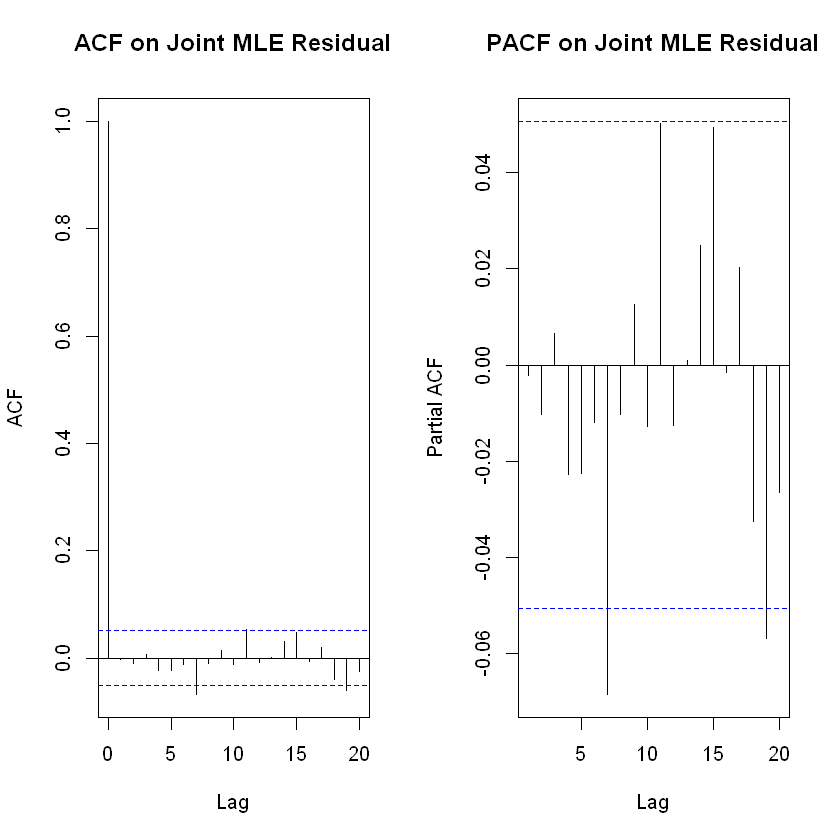

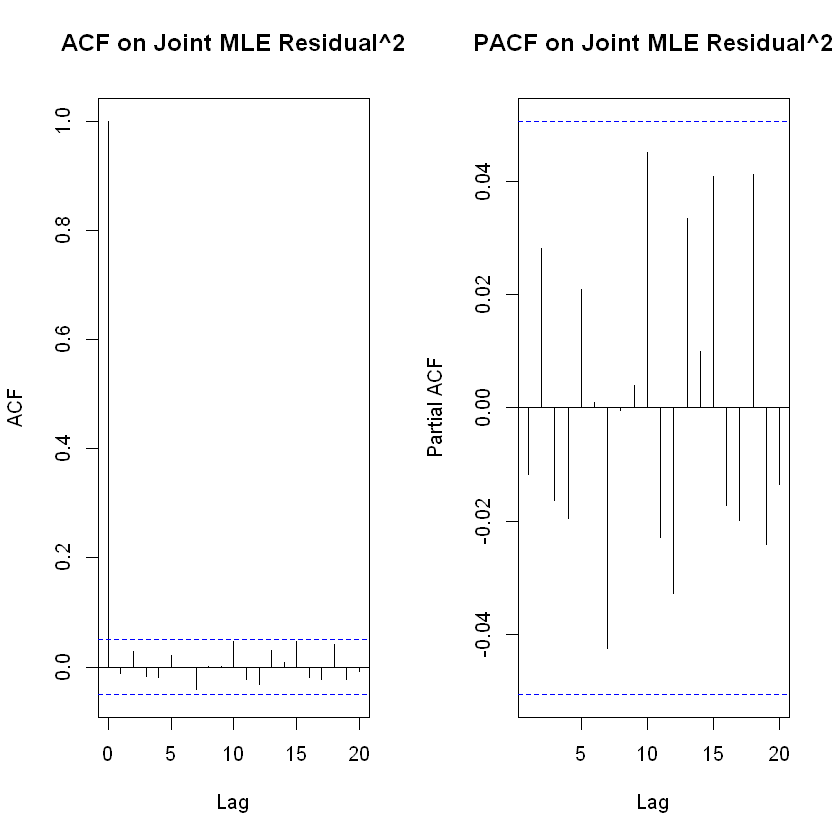

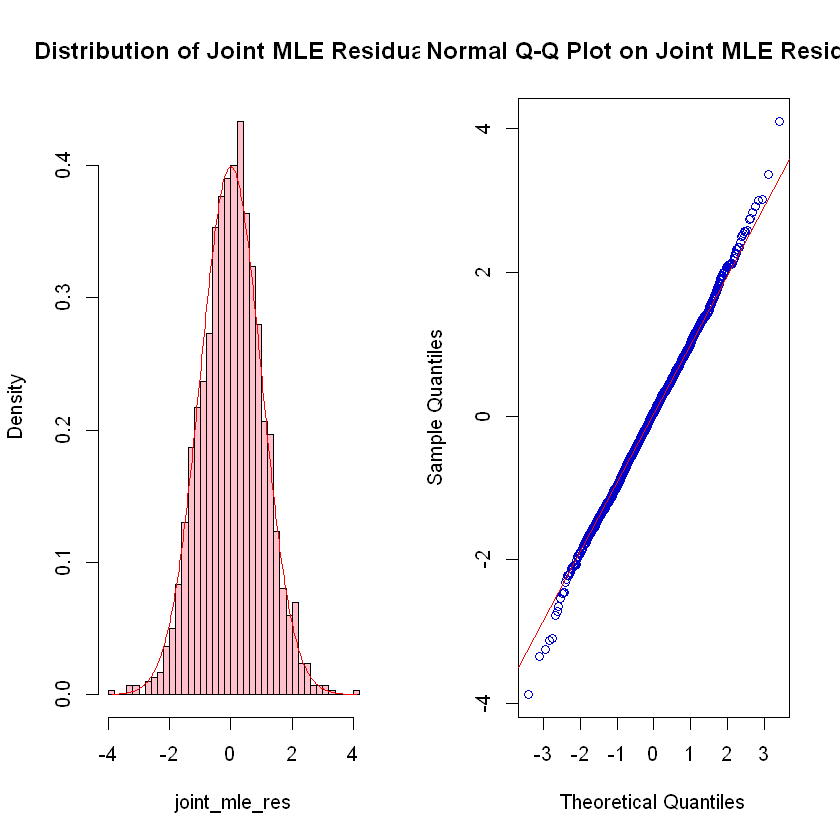

In [18]:
joint_mle_res <- arma_egarch_fit(joint_mle_para, data, m=3, n=2)
## Graph 1: Time Series
par(mfcol=c(1,1))
plot(joint_mle_res, type="l", col="blue3", main="Time Series Plot on Joint MLE Residual", xlab="Time")
## Graph 2: ACF and PACF
par(mfcol=c(1,2))
acf(joint_mle_res, lag.max = 20, plot=TRUE, main="ACF on Joint MLE Residual")
pacf(joint_mle_res, lag.max = 20, plot=TRUE, main="PACF on Joint MLE Residual")
acf(joint_mle_res^2, lag.max = 20, plot=TRUE, main="ACF on Joint MLE Residual^2")
pacf(joint_mle_res^2, lag.max = 20, plot=TRUE, main="PACF on Joint MLE Residual^2")
## Graph 3: Distribution Histogram & QQ Plot
par(mfcol=c(1,2))
hist(joint_mle_res, nclass=30, col="pink", freq=FALSE, main="Distribution of Joint MLE Residual")
t <- seq(min(joint_mle_res),max(joint_mle_res), length=301)
points(t, dnorm(t), col="red", type="l")
qqnorm(joint_mle_res, main="Normal Q-Q Plot on Joint MLE Residual", col="blue3")
qqline(joint_mle_res, col="red")

In [19]:
Box.test(joint_mle_res, lag=15, type="Ljung")
Box.test(joint_mle_res^2, lag=15, type="Ljung")


	Box-Ljung test

data:  joint_mle_res
X-squared = 18.925, df = 15, p-value = 0.2172



	Box-Ljung test

data:  joint_mle_res^2
X-squared = 15.76, df = 15, p-value = 0.3982


Observations:

1. ARMA and Heteroskedasticity is captured, where $\varepsilon$ and $\varepsilon^2$ do NOT show auto-correlation
2. $\varepsilon$ follows Normal distribution well


# Built-in Model


In [21]:
spec <- ugarchspec(variance.model=list(model="eGARCH",garchOrder=c(1,1)),
                   mean.model=list(armaOrder=c(3,2), include.mean=FALSE),
                   distribution.model="norm")
arma_egarch_model <- ugarchfit(spec, data)
show(arma_egarch_model)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(3,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
ar1      0.56520    0.016806   33.6309 0.000000
ar2     -0.48021    0.040253  -11.9297 0.000000
ar3      0.25457    0.021483   11.8499 0.000000
ma1     -0.34548    0.011481  -30.0919 0.000000
ma2      0.64951    0.031790   20.4312 0.000000
omega   -0.77749    0.007260 -107.0962 0.000000
alpha1  -0.22894    0.021833  -10.4858 0.000000
beta1    0.90326    0.000655 1378.9443 0.000000
gamma1   0.10316    0.028782    3.5841 0.000338

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
ar1      0.56520    0.033898   16.674 0.000000
ar2     -0.48021    0.029237  -16.425 0.000000
ar3      0.25457    0.019778   12.871 0.00000

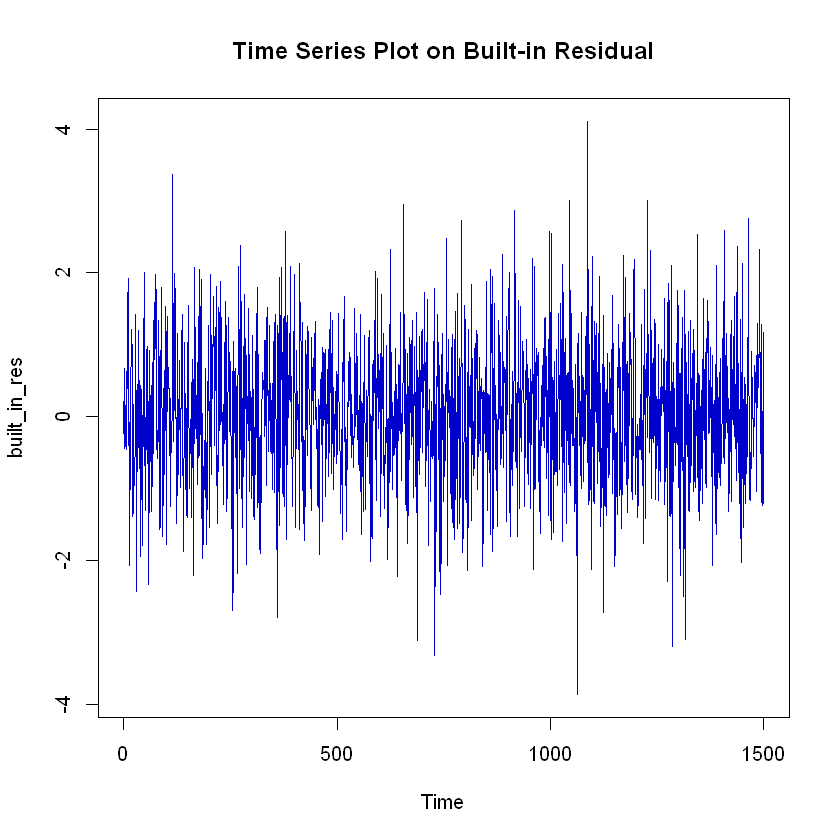

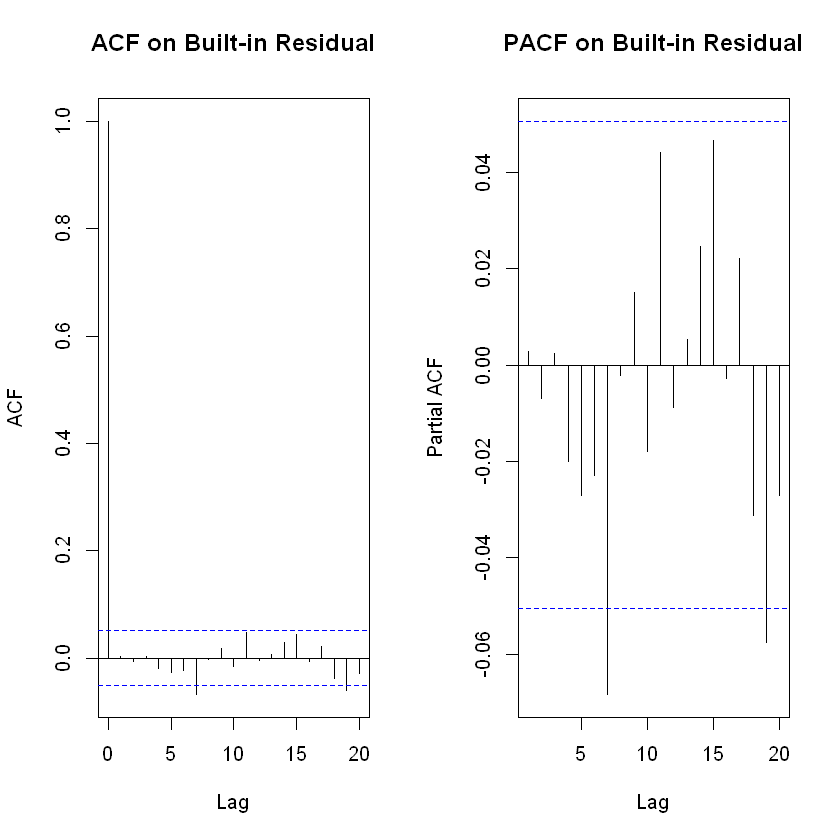

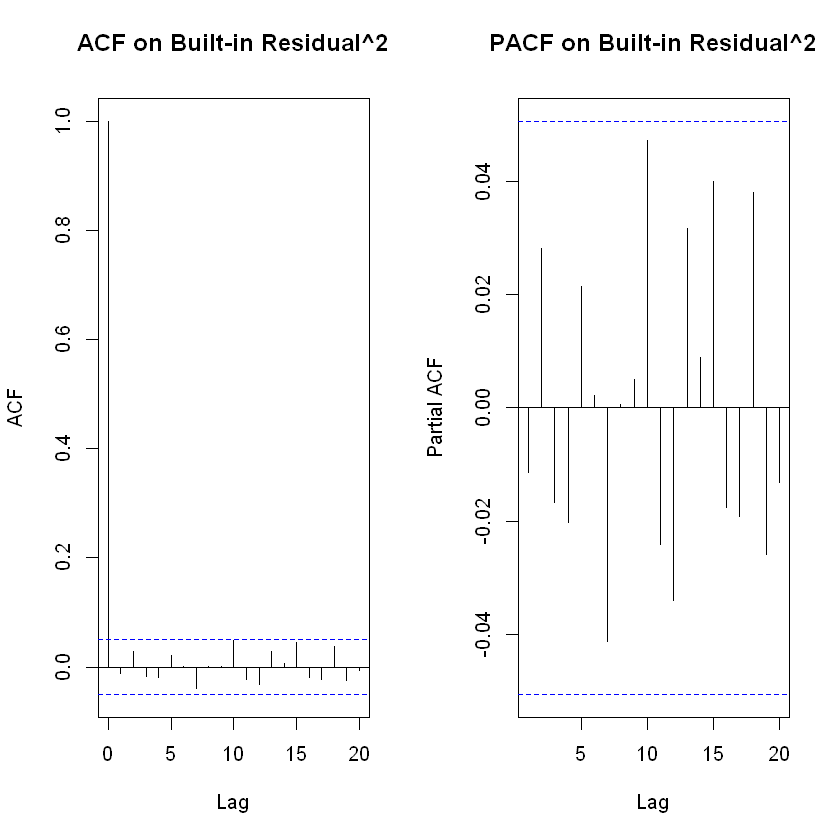

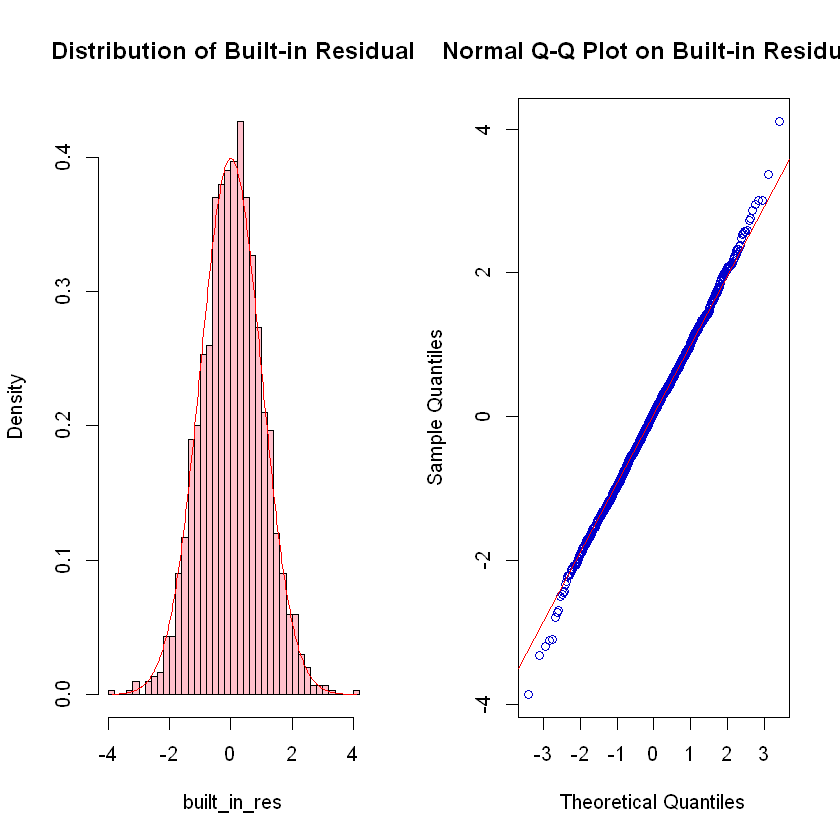

In [22]:
built_in_res <- as.numeric(residuals(arma_egarch_model, standardize=TRUE))
## Graph 1: Time Series
par(mfcol=c(1,1))
plot(built_in_res, type="l", col="blue3", main="Time Series Plot on Built-in Residual", xlab="Time")
## Graph 2: ACF and PACF
par(mfcol=c(1,2))
acf(built_in_res, lag.max = 20, plot=TRUE, main="ACF on Built-in Residual")
pacf(built_in_res, lag.max = 20, plot=TRUE, main="PACF on Built-in Residual")
acf(built_in_res^2, lag.max = 20, plot=TRUE, main="ACF on Built-in Residual^2")
pacf(built_in_res^2, lag.max = 20, plot=TRUE, main="PACF on Built-in Residual^2")
## Graph 3: Distribution Histogram & QQ Plot
par(mfcol=c(1,2))
hist(built_in_res, nclass=30, col="pink", freq=FALSE, main="Distribution of Built-in Residual")
t <- seq(min(built_in_res),max(built_in_res), length=301)
points(t, dnorm(t), col="red", type="l")
qqnorm(built_in_res, main="Normal Q-Q Plot on Built-in Residual", col="blue3")
qqline(built_in_res, col="red")

In [23]:
Box.test(built_in_res, lag=15, type="Ljung")
Box.test(built_in_res^2, lag=15, type="Ljung")


	Box-Ljung test

data:  built_in_res
X-squared = 18.299, df = 15, p-value = 0.2473



	Box-Ljung test

data:  built_in_res^2
X-squared = 15.843, df = 15, p-value = 0.3925


Observations:

1. ARMA and Heteroskedasticity is captured, where $\varepsilon$ and $\varepsilon^2$ do NOT show auto-correlation
2. $\varepsilon$ follows Normal distribution well


# Performance Comparison


In [29]:
para_name <- c("ar1","ar2","ar3","ma1","ma2","omega","gamma","beta","alpha")
true_par <- c(0.6, -0.5, 0.25, -0.4, 0.65, -0.8, -0.2, 0.9, 0.1)
two_step_par <- as.numeric(c(arma_model$coef, coef(egarch_model)))
built_in_par <- as.numeric(coef(arma_egarch_model))
joint_mle_par <- as.numeric(c(joint_mle_para[1:6], joint_mle_para[8:9], joint_mle_para[7]))

In [30]:
tab <- data.frame(
  Parameter = para_name,
  True      = true_par,
  TwoStep   = two_step_par,
  JointMLE  = joint_mle_par,
  BuiltIn   = built_in_par,
  stringsAsFactors = FALSE
)

print(tab, digit=3)

  Parameter  True    TwoStep   JointMLE    BuiltIn
1       ar1  0.60  0.6132353  0.6169885  0.5652038
2       ar2 -0.50 -0.5225940 -0.5077654 -0.4802074
3       ar3  0.25  0.2406229  0.2432455  0.2545666
4       ma1 -0.40 -0.4047278 -0.3921069 -0.3454850
5       ma2  0.65  0.6577489  0.6664284  0.6495100
6     omega -0.80 -0.7993860 -0.8102197 -0.7774908
7     gamma -0.20 -0.2221371 -0.2313952 -0.2289409
8      beta  0.90  0.9003818  0.8992151  0.9032646
9     alpha  0.10  0.1055980  0.1049038  0.1031582


In [31]:
perf_metrics <- function(est, true){
    MSE <- mean((est-true)^2)
    MAE <- mean(abs(est-true))
    return(c(MSE, MAE))
}

print(perf_metrics(two_step_par, true_par))
print(perf_metrics(joint_mle_par, true_par))
print(perf_metrics(built_in_par, true_par))

[1] 0.000153100 0.009601553
[1] 0.0002046098 0.0114592695
[1] 0.0006622641 0.0191148160


Observation:

1. Coef Error: Two Step > Joint MLE >> Built-in
2. Residual Analysis: Joint MLE $\approx$ Built-in > Two Step $\\$

Thoughts: Further investigation in the effect of sample size and model's order
